# Genertors and Random Numbers
This is our week 4 examples notebook and will be available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [69]:
import random
import matplotlib.pyplot as plt
from pprint import pprint
import networkx as nx

## Examples: generator expressions

In [70]:
neighbours = ((i-1, i, i+1) for i in range(1, 10))
print(neighbours)
# We can turn a generator into a list to look at all its elements (though this somewhat defeats the purpose!)
print(list(neighbours))
# Once the "stream" has flowed past, it is empty - there is no way to "replenish" it.
print(list(neighbours))


<generator object <genexpr> at 0x11f792960>
[(0, 1, 2), (1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6), (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10)]
[]


In [71]:
def generate_neighbours(upper_bound):
    for i in range(1, upper_bound):
        yield (i-1, i , i+1)

neighbours2 = generate_neighbours(10)
neighbours2
print(next(neighbours2))
print(next(neighbours2))
print(next(neighbours2))
print(list(neighbours2))
print(list(neighbours2))

(0, 1, 2)
(1, 2, 3)
(2, 3, 4)
[(3, 4, 5), (4, 5, 6), (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10)]
[]


In [72]:
def generate_neighbours2():
    i = 1
    while True:
        yield (i-1, i , i+1)
        i += 1 

neighbours2 = generate_neighbours2()
neighbours2
print(next(neighbours2))
print(next(neighbours2))
print(next(neighbours2))

(0, 1, 2)
(1, 2, 3)
(2, 3, 4)


## This below supposed to be in Chaotic feedback function, but I forgot to move it.

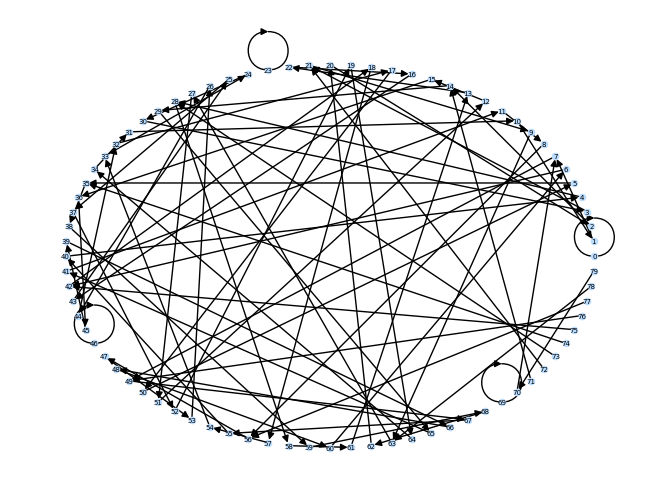

In [73]:
def rand2(seed=49):
    while True:
        seed = seed//10 + 7*(seed%10)
        yield seed

seed = 79
rand_two = rand2(seed=seed)
size = 100000

a = [next(rand_two) for i in range(size)]
network = nx.Graph()
network.add_nodes_from([i for i in range(100)])

for i in range(size-1):
    network.add_edge(a[i],a[i+1])
network.add_edge(seed, a[0])
'''
nx.draw_circular(network,
                 node_color='#bbddff',
                 node_size=20,
                 with_labels=False )#change this to true
plt.axis('equal')
plt.show()
'''

def do_rand_for_a_while(size=100000):
    F_network = nx.DiGraph()
    F_network.add_nodes_from([i for i in range(80)])
    for seedd in range(80):
        rand_two = rand2(seed=seedd)
        f = [next(rand_two) for i in range(size)]

        for i in range(size-1):
            F_network.add_edge(f[i],f[i+1])
        F_network.add_edge(seedd, f[0])

    return F_network
the_network = do_rand_for_a_while()
#nx.draw_networkx()
nx.draw_circular(the_network,
                 node_color='#bbddff',
                 node_size=20,
                 with_labels=True,
                 #arrow_size = 5,
                 font_size = 5
                 )#change this to true
plt.show()

In [74]:
list(the_network.neighbors(63))


[27]

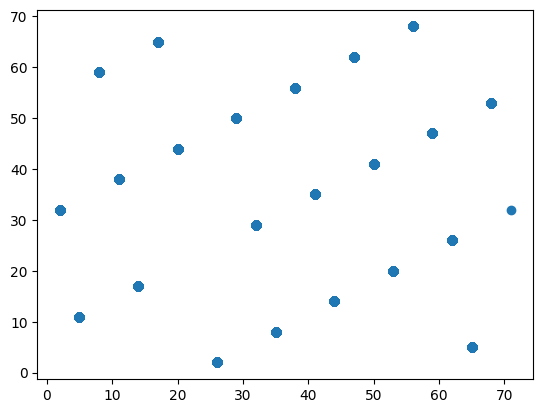

In [75]:
rand = rand2(seed=89)
xs = [next(rand) for i in range(10000)]
ys = [next(rand) for i in range(10000)]
plt.scatter(xs,ys)

## Pseudo-Random Numbers

In [76]:
# A list of n random numbers - again we are turning a "generator" in to a list
n = 10
[random.random() for i in range(n)]

[0.7401740960949807,
 0.0862781504437532,
 0.27900966333305277,
 0.026771711568134737,
 0.950249153493492,
 0.6632698571188512,
 0.4695707416173299,
 0.1858647116411154,
 0.6391792094108583,
 0.5606742138902537]

Essentially built-in random method is also built used chaotic feedback. Just really complex one

<AxesSubplot: >

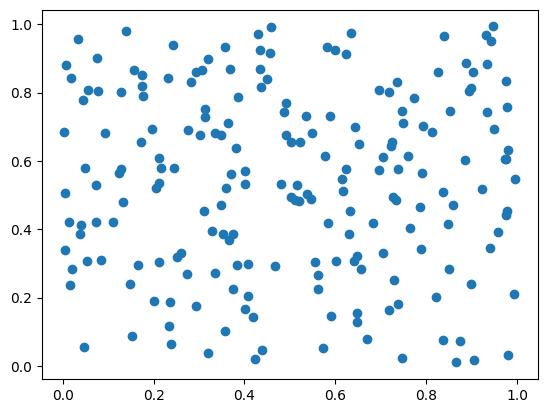

In [77]:
# Scatter plot of random (x,y) coordinates
n = 200
fig, ax = plt.subplots()
ax.scatter([random.random() for i in range(n)], [random.random() for i in range(n)])
ax

## Chaotic Feedback

 * some mathematical functions produce chaotic patterns when you feed their output back in as the next input.

In [78]:
import time

class TwoDigitRand:
    """ demonstrates 'chaotic feedback' algorithm - not crypographic quality randomness!! """
    def __init__(self, seed=None):
        seed = seed or int(time.time()*10**3)  # clock time in milli-seconds
        self.seed = seed % 100  # 2-digit only!

    def rand(self):
        """ chaotic feedback algorithm - the last output is used as input to compute the next one """
        self.seed = self.seed//10 + 7*(self.seed%10)
        return self.seed


r = TwoDigitRand()
[r.rand() for i in range(20)]

[38, 59, 68, 62, 20, 2, 14, 29, 65, 41, 11, 8, 56, 47, 53, 26, 44, 32, 17, 50]

Sequence seed: 50


<AxesSubplot: >

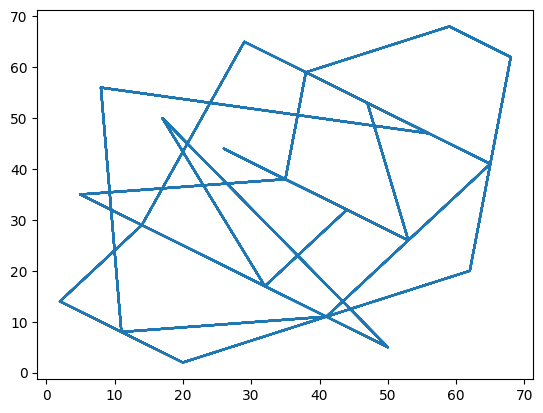

In [79]:
# Scatter plot of (seed, rand(seed))
fig, ax = plt.subplots()
print("Sequence seed:", r.seed)
pairs = [(r.seed, r.rand()) for i in range(n)]
ax.plot([x for x,y in pairs], [y for x,y in pairs])
ax

## Example: computational experiment with random numbers

We'll use the Histogram class developed last week to count the outcomes of the experiment

In [80]:
class Histogram:
    """ A simple histogram with a nice API """
    def __init__(self, title, xlabel=None):
        fig, ax = plt.subplots()
        ax.set_title(title)
        if xlabel:
            ax.set_xlabel(xlabel)
        ax.set_ylabel('Count')
        self.ax = ax
        self.fig = fig
        self.counts = {}

    def count(self, category):
        self.counts[category] = self.counts.get(category, 0) + 1

    def plot(self):
        self.ax.bar(self.counts.keys(), self.counts.values())
        plt.show()

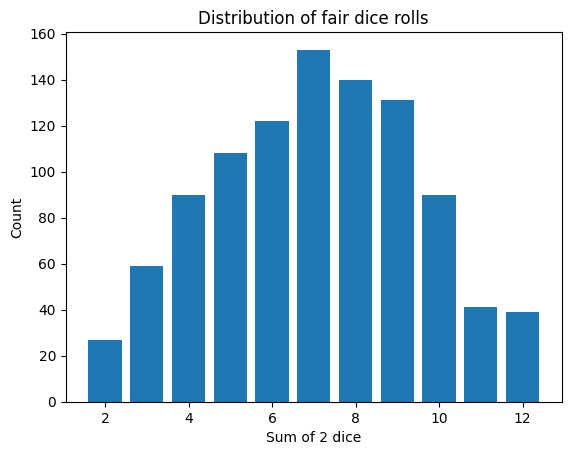

In [81]:
# Experiment: Roll some dice
def roll_dice(sides=6):
    return (random.randint(1,sides), random.randint(1,sides))

# number rolls to use in this experiment
n_rolls = 1000

rolls = Histogram("Distribution of fair dice rolls", xlabel='Sum of 2 dice')
for i in range(n_rolls):
    rolls.count(sum(roll_dice()))

rolls.plot()